<a href="https://colab.research.google.com/github/wnich/datarockie_datasci_bootcamp_06/blob/main/python/API_call.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API call

### Star War

[Star War API](https://swapi.dev/)

In [ ]:
import requests
from bs4 import BeautifulSoup

import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
url = "https://swapi.dev/api/starships/"
resp = requests.get(url) 
resp_status = resp.status_code

In [ ]:
result = resp.json()
result

In [13]:
total_results = []

for page_num in range(1, 2):
    # Build the URL and download the results
    url = "https://swapi.dev/api/planets/?page=" + str(page_num)
    #print("Downloading", url)
    response = requests.get(url)
    result = response.json()
    total_results = total_results + result['results']

print("We have", len(total_results), "total results")

planets_df = pd.json_normalize(total_results)
planets_df.head()

We have 10 total results


,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[https://swapi.dev/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/


In [14]:
planets_df = planets_df.drop(['residents','films','created', 'edited', 'url'  ] , axis=1)


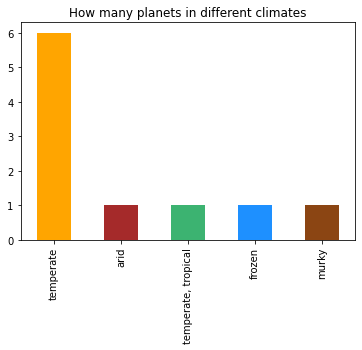

In [62]:
my_colors = ['orange', 'brown', 'mediumseagreen', 'dodgerblue', 'saddlebrown']
climate_planets = planets_df.climate.value_counts().plot.bar(title='How many planets in different climates', color=my_colors)



In [43]:
planets_df_filter = planets_df[planets_df['population'] != 'unknown'] #Filter out unknow values from population

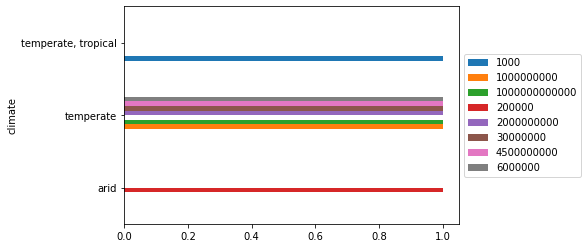

In [49]:
planets_df_nonnum=planets_df_filter.groupby(['climate', 'population']).size()
planets_df_nonnum=planets_df_nonnum.unstack()
climate_pop = planets_df_nonnum.plot(kind='bar', title='Ho).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [69]:
planets_df_clm=planets_df_filter.groupby('climate')['population'].sum().reset_index()


In [84]:
planets_df_clm['population'] = planets_df_clm['population'].astype("float")


In [85]:
planets_df_clm

,climate,population
0,arid,2.000000e+05
1,temperate,2.000000e+57
2,"temperate, tropical",1.000000e+03
